In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torchvision.models import resnet18, ResNet18_Weights
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2  # For webcam
from PIL import Image


In [3]:
import torch
print(torch.cuda.is_available())


True


In [4]:
import ipywidgets as widgets
from IPython.display import display
import io

uploader = widgets.FileUpload(accept='', multiple=True)
display(uploader)


FileUpload(value=(), description='Upload', multiple=True)

In [5]:
import zipfile
import io

# Get the uploaded file content from the uploader widget
file_info = uploader.value[0]
zip_bytes = io.BytesIO(file_info['content'])

with zipfile.ZipFile(zip_bytes, 'r') as zip_ref:
    zip_ref.extractall('dataset')


In [ ]:
# Basic transforms
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

val_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])



train_data = datasets.ImageFolder(root='dataset/train', transform=train_transform)
val_data = datasets.ImageFolder(root='dataset/test', transform=val_transform)

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=False)

class_names = train_data.classes


In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = resnet18(weights=ResNet18_Weights.DEFAULT)
model.fc = nn.Linear(model.fc.in_features, 6) 
model = model.to(device)

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [21]:
from tqdm import tqdm  # Import tqdm for progress bars

train_losses = []
val_losses = []

num_epochs = 25

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    # Use tqdm to show progress for training
    for images, labels in tqdm(train_loader, desc=f"Training Epoch {epoch+1}/{num_epochs}", unit="batch"):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = 100 * correct / total

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc:.2f}%")

    # Validation step
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    # Use tqdm to show progress for validation
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc=f"Validation Epoch {epoch+1}/{num_epochs}", unit="batch", leave=False):
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_epoch_loss = val_loss / val_total
    val_epoch_acc = 100 * val_correct / val_total

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"Validation - Loss: {val_epoch_loss:.4f} - Accuracy: {val_epoch_acc:.2f}%")

# Save the trained model after all epochs
torch.save(model.state_dict(), 'attention_resnet18.pth')
print("Training complete")


Training Epoch 1/25: 100%|██████████| 265/265 [00:42<00:00,  6.17batch/s]


Epoch 1/25 - Loss: 0.1227 - Accuracy: 95.85%


Validation - Loss: 0.0483 - Accuracy: 97.97%


Training Epoch 2/25: 100%|██████████| 265/265 [00:41<00:00,  6.33batch/s]


Epoch 2/25 - Loss: 0.1205 - Accuracy: 95.47%


Validation - Loss: 0.0597 - Accuracy: 97.78%


Training Epoch 3/25: 100%|██████████| 265/265 [00:40<00:00,  6.54batch/s]


Epoch 3/25 - Loss: 0.0864 - Accuracy: 96.65%


Validation - Loss: 0.0557 - Accuracy: 97.92%


Training Epoch 4/25: 100%|██████████| 265/265 [00:41<00:00,  6.38batch/s]


Epoch 4/25 - Loss: 0.0948 - Accuracy: 96.42%


Validation - Loss: 0.0503 - Accuracy: 97.92%


Training Epoch 5/25: 100%|██████████| 265/265 [00:42<00:00,  6.28batch/s]


Epoch 5/25 - Loss: 0.1111 - Accuracy: 96.08%


Validation - Loss: 0.0499 - Accuracy: 97.97%


Training Epoch 6/25: 100%|██████████| 265/265 [00:43<00:00,  6.10batch/s]


Epoch 6/25 - Loss: 0.1066 - Accuracy: 96.18%


Validation - Loss: 0.0500 - Accuracy: 97.92%


Training Epoch 7/25: 100%|██████████| 265/265 [00:42<00:00,  6.17batch/s]


Epoch 7/25 - Loss: 0.0868 - Accuracy: 96.98%


Validation - Loss: 0.0539 - Accuracy: 97.92%


Training Epoch 8/25: 100%|██████████| 265/265 [00:43<00:00,  6.14batch/s]


Epoch 8/25 - Loss: 0.1166 - Accuracy: 96.18%


Validation - Loss: 0.0531 - Accuracy: 97.88%


Training Epoch 9/25: 100%|██████████| 265/265 [00:43<00:00,  6.16batch/s]


Epoch 9/25 - Loss: 0.0953 - Accuracy: 96.56%


Validation - Loss: 0.0594 - Accuracy: 97.78%


Training Epoch 10/25: 100%|██████████| 265/265 [00:42<00:00,  6.27batch/s]


Epoch 10/25 - Loss: 0.1061 - Accuracy: 95.94%


Validation - Loss: 0.0596 - Accuracy: 97.83%


Training Epoch 11/25: 100%|██████████| 265/265 [00:42<00:00,  6.26batch/s]


Epoch 11/25 - Loss: 0.1151 - Accuracy: 96.23%


Validation - Loss: 0.0584 - Accuracy: 97.78%


Training Epoch 12/25: 100%|██████████| 265/265 [00:42<00:00,  6.26batch/s]


Epoch 12/25 - Loss: 0.0905 - Accuracy: 96.60%


Validation - Loss: 0.0482 - Accuracy: 98.02%


Training Epoch 13/25: 100%|██████████| 265/265 [00:42<00:00,  6.24batch/s]


Epoch 13/25 - Loss: 0.1239 - Accuracy: 95.61%


Validation - Loss: 0.0562 - Accuracy: 97.88%


Training Epoch 14/25: 100%|██████████| 265/265 [00:42<00:00,  6.25batch/s]


Epoch 14/25 - Loss: 0.0988 - Accuracy: 96.51%


Validation - Loss: 0.0554 - Accuracy: 97.88%


Training Epoch 15/25: 100%|██████████| 265/265 [00:42<00:00,  6.26batch/s]


Epoch 15/25 - Loss: 0.1214 - Accuracy: 96.32%


Validation - Loss: 0.0478 - Accuracy: 98.02%


Training Epoch 16/25: 100%|██████████| 265/265 [00:39<00:00,  6.68batch/s]


Epoch 16/25 - Loss: 0.0970 - Accuracy: 96.42%


Validation - Loss: 0.0570 - Accuracy: 97.97%


Training Epoch 17/25: 100%|██████████| 265/265 [00:39<00:00,  6.69batch/s]


Epoch 17/25 - Loss: 0.1058 - Accuracy: 96.13%


Validation - Loss: 0.0535 - Accuracy: 97.83%


Training Epoch 18/25: 100%|██████████| 265/265 [00:39<00:00,  6.69batch/s]


Epoch 18/25 - Loss: 0.1069 - Accuracy: 96.42%


Validation - Loss: 0.0567 - Accuracy: 97.88%


Training Epoch 19/25: 100%|██████████| 265/265 [00:39<00:00,  6.63batch/s]


Epoch 19/25 - Loss: 0.1077 - Accuracy: 95.90%


Validation - Loss: 0.0489 - Accuracy: 98.11%


Training Epoch 20/25: 100%|██████████| 265/265 [00:39<00:00,  6.68batch/s]


Epoch 20/25 - Loss: 0.1112 - Accuracy: 96.04%


Validation - Loss: 0.0462 - Accuracy: 98.11%


Training Epoch 21/25: 100%|██████████| 265/265 [00:39<00:00,  6.68batch/s]


Epoch 21/25 - Loss: 0.1112 - Accuracy: 96.23%


Validation - Loss: 0.0603 - Accuracy: 97.74%


Training Epoch 22/25: 100%|██████████| 265/265 [00:41<00:00,  6.31batch/s]


Epoch 22/25 - Loss: 0.1000 - Accuracy: 96.23%


Validation - Loss: 0.0525 - Accuracy: 97.88%


Training Epoch 23/25: 100%|██████████| 265/265 [00:42<00:00,  6.27batch/s]


Epoch 23/25 - Loss: 0.1155 - Accuracy: 95.66%


Validation - Loss: 0.0542 - Accuracy: 97.78%


Training Epoch 24/25: 100%|██████████| 265/265 [00:42<00:00,  6.26batch/s]


Epoch 24/25 - Loss: 0.1073 - Accuracy: 96.04%


Validation - Loss: 0.0575 - Accuracy: 97.78%


Training Epoch 25/25: 100%|██████████| 265/265 [00:42<00:00,  6.26batch/s]


Epoch 25/25 - Loss: 0.1027 - Accuracy: 96.23%


Validation - Loss: 0.0542 - Accuracy: 97.97%
Training complete


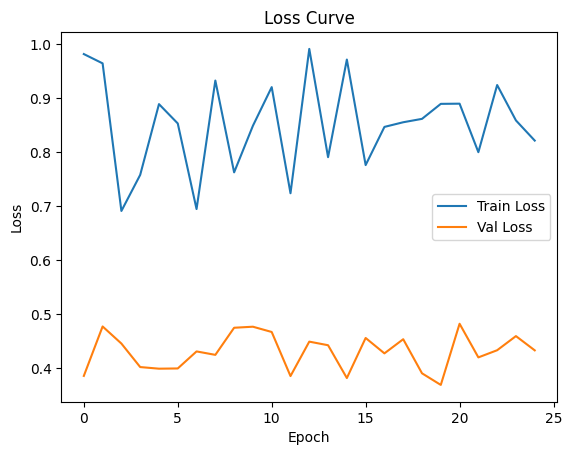

In [22]:
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.legend()
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [23]:
# Load model for testing/inference
model = models.resnet18(weights=None)
model.fc = nn.Linear(model.fc.in_features, 6)
model.load_state_dict(torch.load('attention_resnet18.pth', map_location=device))
model = model.to(device)
model.eval()



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

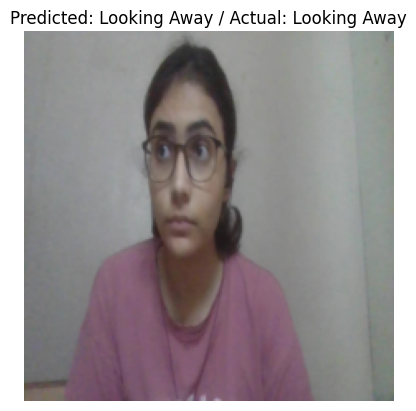

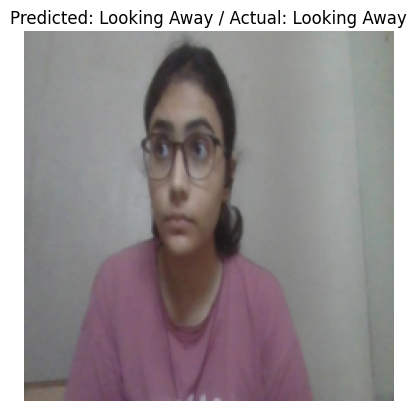

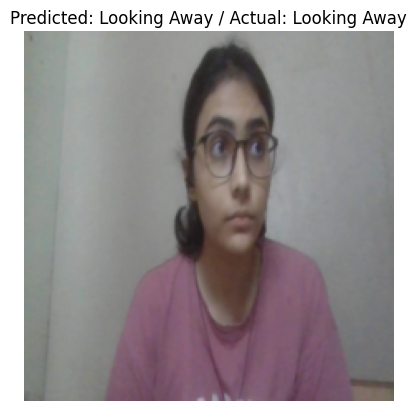

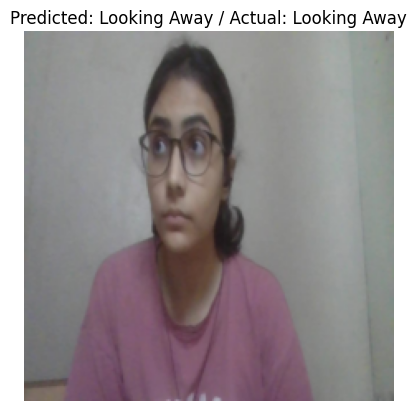

In [13]:
def imshow(img, title):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis('off')
    plt.show()

model.eval() 

data_iter = iter(val_loader)
images, labels = next(data_iter)

images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

#ni kita try display first 4 predictions
for i in range(4):
    imshow(images[i].cpu(), f'Predicted: {class_names[predicted[i]]} / Actual: {class_names[labels[i]]}')

In [24]:
# Required imports
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch
from torchvision import models
import ipywidgets as widgets
from IPython.display import display
import io

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define label names (same order as training)
emotion_labels = ['bored', 'confused', 'drowsy', 'engaged', 'frustrated', 'Looking away']

test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# this is to predict emotion fucntion
def predict_emotion_from_bytes(image_bytes, model):
    image = Image.open(io.BytesIO(image_bytes)).convert('L')
    image_tensor = test_transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(image_tensor)
        _, predicted = torch.max(output, 1)
        predicted_label = emotion_labels[predicted.item()]

    # Display image and prediction
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted Emotion: {predicted_label}")
    plt.axis('off')
    plt.show()

uploader = widgets.FileUpload(accept='image/*', multiple=False)

def on_upload_change(change):
    if len(uploader.value) > 0:
        uploaded_file = uploader.value[0]
        content = uploaded_file['content']

        predict_emotion_from_bytes(content, model)

uploader.observe(on_upload_change, names='value')
display(uploader)



FileUpload(value=(), accept='image/*', description='Upload')

In [25]:
import cv2

# Load Haar Cascade for face detection (comes with OpenCV)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

emotion_labels = ['bored', 'confused', 'drowsy', 'engaged', 'frustrated', 'Looking away']

webcam_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

cap = cv2.VideoCapture(0)
print("Press 'q' to quit webcam")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in grayscale image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Crop face from original frame (color)
        face_img = frame[y:y+h, x:x+w]

        # Convert BGR to RGB for model
        face_rgb = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

        # Preprocess face image
        img_tensor = webcam_transform(face_rgb).unsqueeze(0).to(device)

        # Predict emotion
        with torch.no_grad():
            output = model(img_tensor)
            _, predicted = torch.max(output, 1)
            emotion = emotion_labels[predicted.item()]

        # Draw rectangle around face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Put emotion text above rectangle
        cv2.putText(frame, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 
                    0.9, (0, 255, 0), 2)

    cv2.imshow('Emotion Detection - Online Class', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Press 'q' to quit webcam


In [26]:
import cv2
import torch
from torchvision import transforms

# Load Haar Cascade for face detection (comes with OpenCV)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

emotion_labels = ['bored', 'confused', 'drowsy', 'engaged', 'frustrated', 'Looking away']

webcam_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

cap = cv2.VideoCapture(0)
print("Press 'q' to quit webcam")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in grayscale image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Increase the bounding box size significantly
        padding = 30  # Increase padding to make the bounding box much larger
        x -= padding
        y -= padding
        w += 2 * padding
        h += 2 * padding

        # Make sure the box doesn't go outside the image boundaries
        x = max(x, 0)
        y = max(y, 0)
        w = min(w, frame.shape[1] - x)
        h = min(h, frame.shape[0] - y)

        # Crop face from original frame (color)
        face_img = frame[y:y+h, x:x+w]

        # Convert BGR to RGB for model
        face_rgb = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

        # Preprocess face image
        img_tensor = webcam_transform(face_rgb).unsqueeze(0).to(device)

        # Predict emotion
        with torch.no_grad():
            output = model(img_tensor)
            _, predicted = torch.max(output, 1)
            emotion = emotion_labels[predicted.item()]

        # Draw rectangle around face (with enlarged box)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Put emotion text above rectangle
        cv2.putText(frame, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.9, (0, 255, 0), 2)

    cv2.imshow('Emotion Detection - Online Class', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Press 'q' to quit webcam
